In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [2]:
car = pd.read_csv("./car+evaluation/car.data", header=None)
car.columns = ['Buying', 'Maint', 'Doors','Persons','LugBoot','Safety','Evaluation']
car.head()

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Buying      1728 non-null   object
 1   Maint       1728 non-null   object
 2   Doors       1728 non-null   object
 3   Persons     1728 non-null   object
 4   LugBoot     1728 non-null   object
 5   Safety      1728 non-null   object
 6   Evaluation  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
car.describe()

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [5]:
car.Buying.replace(('vhigh', 'high', 'med', 'low'), (1, 2, 3, 4), inplace=True)
car.Maint.replace(('vhigh', 'high', 'med', 'low'), (1,2,3,4), inplace=True)
car.Doors.replace(('2', '3', '4', '5more'), (1,2,3,4), inplace=True)
car.Persons.replace(('2', '4', 'more'), (1,2,3), inplace=True)
car.LugBoot.replace(('small', 'med', 'big'), (1, 2, 3), inplace=True)
car.Safety.replace(('low', 'med', 'high'), (1,2,3), inplace=True)
car.Evaluation.replace(('unacc', 'acc', 'good', 'vgood'), (1,2,3,4), inplace=True)

car.head()

,Buying,Maint,Doors,Persons,LugBoot,Safety,Evaluation
0,1,1,1,1,1,1,1
1,1,1,1,1,1,2,1
2,1,1,1,1,1,3,1
3,1,1,1,1,2,1,1
4,1,1,1,1,2,2,1


In [6]:
#Checking whether the dataset contains any null values
print(car.isna().values.any())
print(car.isnull().values.any())

False
False


In [7]:
#Splitting the data into train set and test set

data_split = np.random.rand(len(car))<0.7
train = car[data_split]
test = car[~data_split]
train.shape, test.shape


((1227, 7), (501, 7))

In [8]:
#Separating the Independent and the Dependent Variables
X_train = train.drop("Evaluation", axis=1)
X_train = X_train.values
y_train = train["Evaluation"]
y_train = y_train.values

X_test = test.drop("Evaluation", axis=1)
X_test = X_test.values
y_test = test["Evaluation"]
y_test = y_test.values

X_train.shape
y_train.shape

(1227,)

In [9]:
class KNN:
    def __init__(self, k): #Constructor Method to initialise the KNN object with k
        self.k = k
    def fit(self, X, y): #Method to fit the Model to the training data
        self.X_train = X
        self.y_train = y
    def distance(self, X1, X2): #Method to calculate the euclidean distance
        dist = np.sqrt(np.sum(np.square(X1 - X2)))
        return dist
    def predict(self, X_test): #Method to make predictions for X_test using the already given data stored in self
        final_output = []
        for i in range(len(X_test)): #Loop to iterate throught each data point of X_test
            d = []
            votes = []
            for j in range(len(self.X_train)): #Loop to iterate through the training dataset
                dist = self.distance(self.X_train[j], X_test[i])
                d.append([dist, j]) #d list stores the distances and their corresponding training data points
            d.sort() #Sorting the list in ascending order
            d = d[:self.k] #Only the top k neighbors are retained
            for d, j in d: #Looping through the distance and indices of the selected k neighbors
                votes.append(y_train[j]) #Appending the class label of the training data point with index 'j'
            ans = Counter(votes).most_common(1)[0][0] #Counting the number of votes for each class. Class with the most votes in determined as the prediction
            final_output.append(ans) #Result is stored in the final output list
        return final_output
    def score(self, X_test, y_test): #Method to predict the accuracy of the KNN class
        predictions = self.predict(X_test)
        corrected_pred = 0
        for i in range(len(predictions)):
            if(predictions[i]==y_test[i]):
                corrected_pred +=1
        return corrected_pred / len(predictions)

In [10]:
#Prediction

KNN_Classi = KNN(7)
KNN_Classi.fit(X_train, y_train)
predictions = KNN_Classi.predict(X_test)
accuracy_KNN = KNN_Classi.score(X_test, y_test)

print("Accuracy : ", accuracy_KNN)

print("Predicted\tTrue Values\tComparison")
for pred, true_value in zip(predictions, y_test):
    comparison = pred == true_value
    print(f'{pred}  \t\t {true_value}  \t\t {comparison} \n')

Accuracy :  0.9281437125748503
Predicted	True Values	Comparison
1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		

In [11]:
#Random Prediction
KNN_Classi = KNN(7)
KNN_Classi.fit(X_train, y_train)
random_test = np.array([1,1,1,1,2,3]).reshape(1, -1)

predictions = KNN_Classi.predict(random_test)

print("Predicted Class: ", predictions[0])


Predicted Class:  1


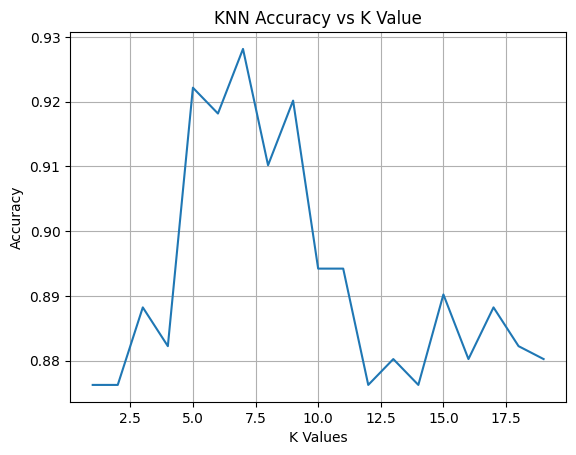

In [12]:
from sklearn.metrics import accuracy_score

accuracies = []
k_values = range(1,20)

for k in k_values:
    knn = KNN(k)
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)

plt.plot(k_values, accuracies)
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy vs K Value')
plt.grid()
plt.show()

Weighted KNN

In [21]:
class WEIGHTED_KNN:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def distance(self, X1, X2):
        dist = np.sqrt(np.sum(np.square(X1 - X2)))
        return dist

    def predict(self, X_test):
        final_output = []
        for i in range(len(X_test)):
            d = []  # Stores distances
            votes = Counter()
            for j in range(len(self.X_train)):
                dist = self.distance(self.X_train[j], X_test[i])
                d.append([dist, j])
            d.sort()
            d = d[:self.k]
            weights = [1/wei for wei, _ in d]
            total_weights = sum(weights)
            weight = [w / total_weights for w in weights]
            for (di, j), weig in zip(d, weight):
                votes[y_train[j]] += weig
            ans = votes.most_common(1)[0][0]
            final_output.append(ans)
        return final_output


    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        corrected_pred = 0
        for i in range(len(predictions)):
            if predictions[i] == y_test[i]:
                corrected_pred += 1
        return corrected_pred / len(predictions)


In [22]:
#Prediction

KNN_Classi = WEIGHTED_KNN(3)
KNN_Classi.fit(X_train, y_train)
predictions = KNN_Classi.predict(X_test)
accuracy_WKNN = KNN_Classi.score(X_test, y_test)

print("Accuracy : ", accuracy_WKNN)

print("Predicted\tTrue Values\tComparison")
for pred, true_value in zip(predictions, y_test):
    comparison = pred == true_value
    print(f'{pred}  \t\t {true_value}  \t\t {comparison} \n')

Accuracy :  0.8882235528942116
Predicted	True Values	Comparison
1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		

In [23]:
#Random Prediction
KNN_Classi = WEIGHTED_KNN(3)
KNN_Classi.fit(X_train, y_train)
random_test = np.array([1,0,1,0,1,1,]).reshape(1, -1)

predictions = KNN_Classi.predict(random_test)

print("Predicted Class: ", predictions[0])

Predicted Class:  1


Nearest Centroid Classifier

In [24]:
class NEAREST_CENTROID:
    def __init__(self, k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def distance(self, X1, X2):
        dist = np.sqrt(np.sum(np.square(X1 - X2)))
        return dist

    def predict(self, X_test):
        unique_classes = np.unique(self.y_train)
        centroids = {}

        for class_label in unique_classes:
            class_indices = np.where(self.y_train == class_label)
            class_data = self.X_train[class_indices]
            class_centroid = np.mean(class_data, axis=0)
            centroids[class_label] = class_centroid

        final_output = []
        for i in range(len(X_test)):
            d = []  # Stores distances
            for class_label, centroid in centroids.items():
                dist = self.distance(centroid, X_test[i])
                d.append((dist, class_label))
            d.sort()  # Sort by distance
            d = d[:self.k]  # Keep the top k nearest centroids
            nearest_classes = [class_label for _, class_label in d]
            ans = Counter(nearest_classes).most_common(1)[0][0]
            final_output.append(ans)
        return final_output

    def score(self, X_test, y_test):
        predictions = self.predict(X_test)
        corrected_pred = 0
        for i in range(len(predictions)):
            if predictions[i] == y_test[i]:
                corrected_pred += 1
        return corrected_pred / len(predictions)


In [25]:
#Prediction

KNN_Classi = NEAREST_CENTROID(4)
KNN_Classi.fit(X_train, y_train)
predictions = KNN_Classi.predict(X_test)
accuracy_NCC = KNN_Classi.score(X_test, y_test)

print("Accuracy : ", accuracy_NCC)

print("Predicted\tTrue Values\tComparison")
for pred, true_value in zip(predictions, y_test):
    comparison = pred == true_value
    print(f'{pred}  \t\t {true_value}  \t\t {comparison} \n')

Accuracy :  0.720558882235529
Predicted	True Values	Comparison
1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

2  		 1  		 False 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

2  		 1  		 False 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

2  		 1  		 False 

1  		 1  		 True 

2  		 1  		 False 

1  		 1  		 True 

1  		 1  		 True 

2  		 1  		 False 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

2  		 1  		 False 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 

1  		 1  		 True 



In [26]:
#Random Prediction
KNN_Classi = NEAREST_CENTROID(4)
KNN_Classi.fit(X_train, y_train)
random_test = np.array([1,0,1,0,1,1]).reshape(1, -1)

predictions = KNN_Classi.predict(random_test)

print("Predicted Class: ", predictions[0])

Predicted Class:  1


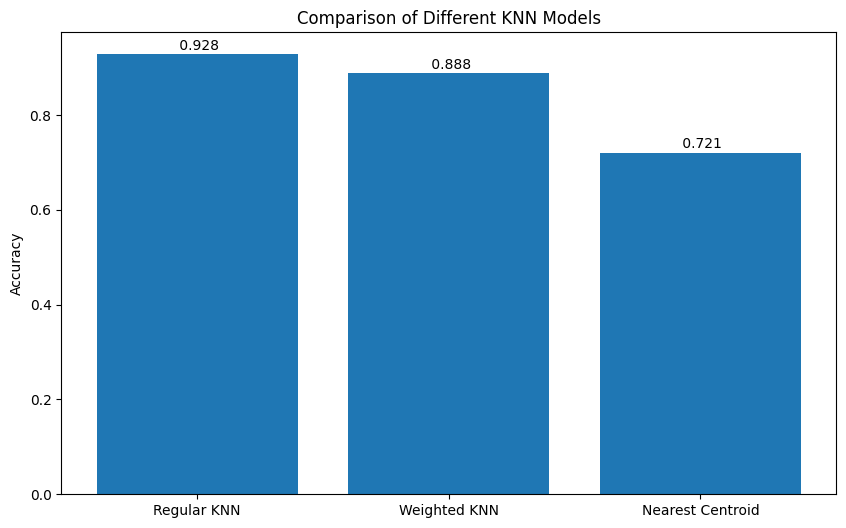

In [27]:
#Comparison chart between the Accuracies of all variants of KNN

model_names = ['Regular KNN', 'Weighted KNN', 'Nearest Centroid']
accuracy_scores = [accuracy_KNN, accuracy_WKNN, accuracy_NCC]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_scores)
plt.title("Comparison of Different KNN Models")
plt.ylabel('Accuracy')
#plt.ylim(0,1) #Setting the y-axos limit to ensure the same scale
for bar, accuracy in zip(bars, accuracy_scores):
    plt.text(bar.get_x()+bar.get_width()/2, bar.get_height()+0.01, f'{accuracy: .3f}', ha='center')
plt.show()